In [147]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity
from matplotlib.ticker import PercentFormatter
import rebound as rb
import reboundx as rx

In [3]:
#x = np.loadtxt("/cita/d/homes/home-2/ksmith/CTA_HW/raw_data_storage/SUNNY_raw_survival_time.npy")
# SUNNY_raw_survival_time_eb0.35_ap2.6666666666666665.npy

raw_surv = []

for num in range(tup_num*Np):
    x = np.loadtxt(f"/mnt/raid-cita/ksmith/CSTE_SUNNY/SUNNY_raw_survival_time_eb{tup_list[num][1]}_ap{tup_list[num][2]}.npy")
    raw_surv.extend(x)
    
#print(len(raw_surv))
    #print(len(x), x)
# this data set will be "x"

<AxesSubplot:title={'center':'Marginal Distribution of Survival Times'}, xlabel='Survival Times', ylabel='Frequency'>

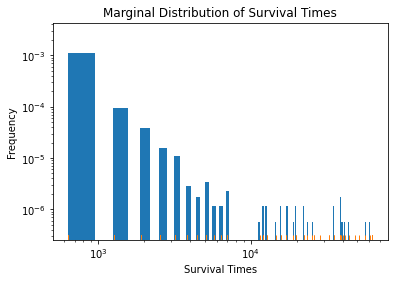

In [76]:
plt.hist(raw_surv, density=True, stacked=True, bins=200)
plt.yscale("log")
plt.xscale("log")

plt.xlabel("Survival Times")
plt.ylabel("Frequency")
plt.title("Marginal Distribution of Survival Times")

# add blue line showing the kernel density estimate (see density function help file to read details)
#np.histogram()
#lines(density(x), col="blue")

# add the actual data points along the bottom of the plot
sns.rugplot(raw_surv)

#kernal_data = np.array(raw_surv).reshape(-1,1)
#kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(kernal_data) #not sure what bandwidth does
#log_dens = kde.score_samples(kernal_data)

#rug(x)

In [125]:
# critcal semi-major axis equation, blue cruve from colourmap

# try to incorporate these critical semi-major axis values when choosing which files to plot in histograms for the 
#     vertical slicing where we hold e constant while 
a_c = 1.6 + 5.1*e_b + (- 2.22*(e_b**2)) + 4.12*0.5 + (- 4.27*e_b*0.5) + (- 5.09*(0.5**2)) + 4.61*(e_b**2)*(0.5**2)
print(a_c)
print(a_p)
# can look w/in this range of a_p and a maybe the whole range of e_b or change the range for each verical row of a_p 
# to avoid plotting lots of histograms with full survival times

[2.3875     2.47307105 2.55682587 2.63876445 2.71888681 2.79719293
 2.87368281 2.94835647 3.02121389 3.09225508 3.16148003 3.22888876
 3.29448125 3.35825751 3.42021753 3.48036133 3.53868889 3.59520022
 3.64989531 3.70277418 3.75383681 3.8030832  3.85051337 3.8961273
 3.939925  ]
[1.         1.16666667 1.33333333 1.5        1.66666667 1.83333333
 2.         2.16666667 2.33333333 2.5        2.66666667 2.83333333
 3.         3.16666667 3.33333333 3.5        3.66666667 3.83333333
 4.         4.16666667 4.33333333 4.5        4.66666667 4.83333333
 5.        ]


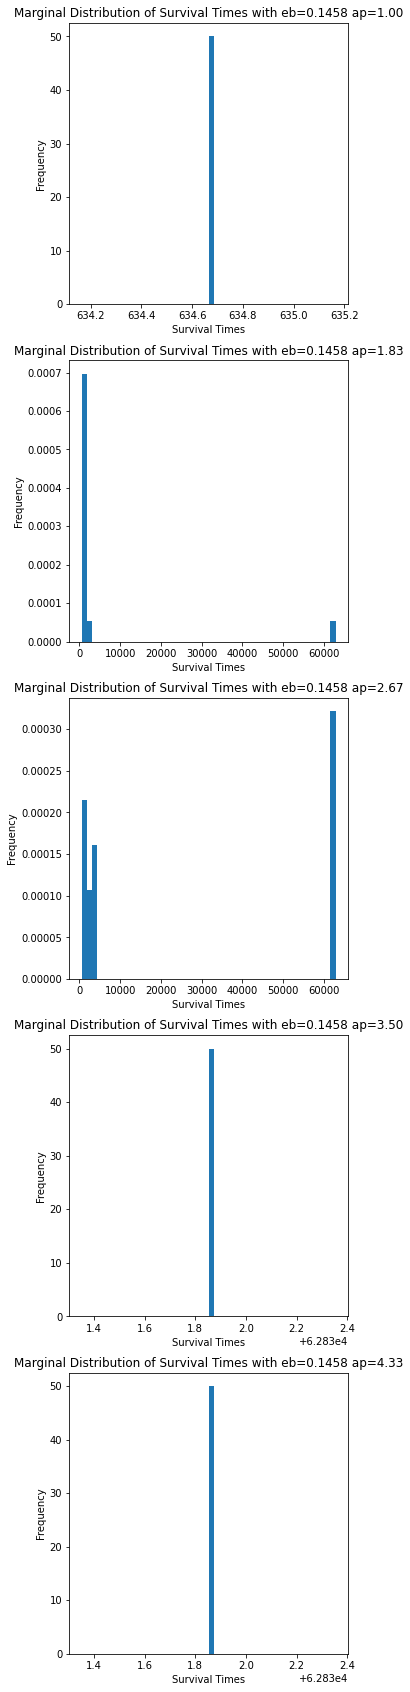

In [155]:
"""Colour Map Vertical Slicing"""

fig, ax = plt.subplots(5, 1, figsize=(5,30)) # sharex=True
# try a while loop for a_p to restrict it to being within the range of the critical semi-major axis a_c

for num, a in enumerate(a_p[::5]):
    bin_ecc = e_b[5]
    x = np.loadtxt(f"/mnt/raid-cita/ksmith/CSTE_SUNNY/SUNNY_raw_survival_time_eb{bin_ecc}_ap{a}.npy")
        
    ax[num].hist(x, density=True, stacked=True, bins=50)
    #ax[num].set_xlim([634.64,634.7])
    #set x axis to be the same, share x axis 
    #ax[num].set_yscale("log")
    #ax[num].set_xscale("log")
    ax[num].set_xlabel("Survival Times")
    ax[num].set_ylabel("Frequency")
    ax[num].set_title(r"Marginal Distribution of Survival Times with eb={:.4f} ap={:.2f}".format(bin_ecc,a))

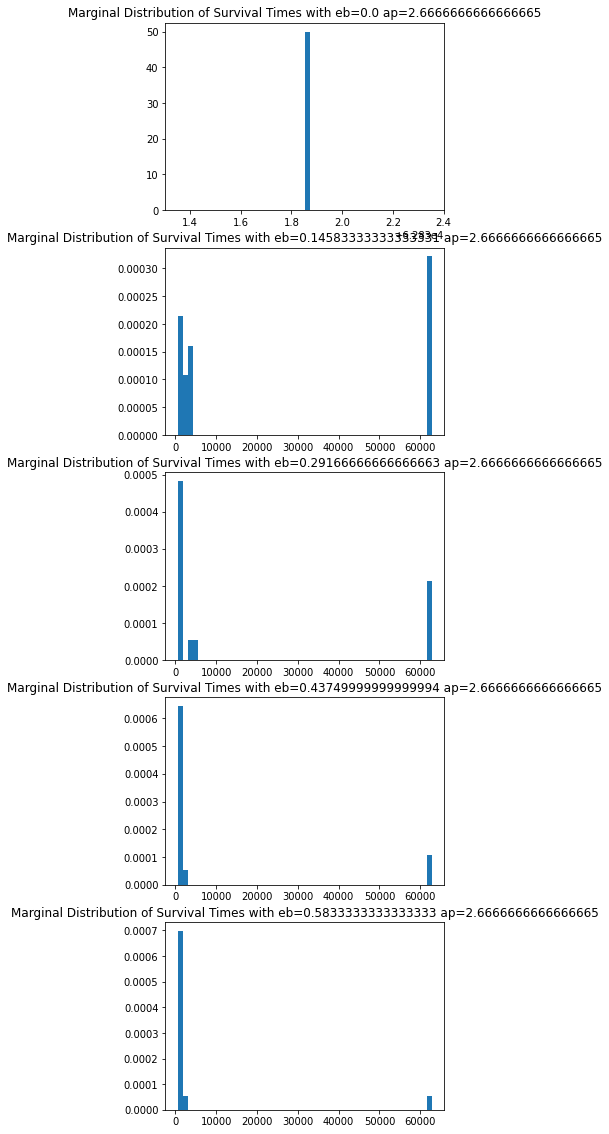

In [149]:
"""Colour Map Horizontal Slicing"""

fig, ax = plt.subplots(5, 1, figsize=(5,20)) # sharex=True

for num, e in enumerate(e_b[::5]):
    #for e in e_b[::5]:
    plan_semi = a_p[10]
    x = np.loadtxt(f"/mnt/raid-cita/ksmith/CSTE_SUNNY/SUNNY_raw_survival_time_eb{e}_ap{plan_semi}.npy")
        
    ax[num].hist(x, density=True, stacked=True, bins=50)
    #ax[num].set_xlim([634.64,634.7])
        # set x axis to be the same, share x axis 
    #ax[num].set_yscale("log")
        #ax[num].set_xscale("log")
        #ax[num].set_xlabel("Survival Times")
        #ax[num].set_ylabel("Frequency")
    ax[num].set_title(f"Marginal Distribution of Survival Times with eb={e} ap={plan_semi}")

### Inner Most Stable Orbits

In [4]:
def class_stats(tup_num,Q,file):
    # file of the form:
        # CSTE_SUNNY/SUNNY_
        # CSTE_SUNNY_FINE_TUP_50/SUNNY_
        # CSTE_SUNNY_FINE_LONG/SUNNY_LONG_

    e_b = list(np.linspace(0, 0.7, tup_num))
    a_p = list(np.linspace(1, 5, tup_num))
    Np = 15
    Qex = []
    for x in range(Q1,Q2): # 4,7 and 1,3
        Q = 10**x
        Qex.append(Q)
    tup_list = []
    for Q in Qex:
        for e in e_b:
            for a in a_p:
                tup_list.append((Q,e,a,Np))
    
    directory = "/mnt/raid-cita/ksmith/"
    a_stable = []
    full_sim = (1e4*2*np.pi)
    
    fig, axs = plt.subplots(3,figsize=(10,15))

    for e in e_b:
        for a in reversed(a_p):
                #for Q in Qex: FIGURE OUT HOW TO LOOK THROUGH ALL Q'S AND PLOT AND LABEL THEM AS SUCH
            x = np.loadtxt(directory+file+f"raw_survival_time_eb{e}_ap{a}_Q{Q}.npy") # there's 10 and 100 but I will run simulations to also include 1000 and 10,000
            if np.any(x!=full_sim):
                a_US = a_p.index(a)
                a_stable.append(a_p[a_US + 1])
                break    

    a_c = []
    for e in e_b:
        a_critical = 1.6 + 5.1*e + (- 2.22*(e**2)) + 4.12*0.5 + (- 4.27*e*0.5) + (- 5.09*(0.5**2)) + 4.61*(e**2)*(0.5**2)
        a_c.append(a_critical)

    sigma = []
    for s, c in zip(a_stable, a_c):
        sigma.append(c-s)

    fig, axs = plt.subplots(3,figsize=(10,15))

    axs.plot(e_b,a_stable)
    axs.scatter(e_b,a_stable)
    axs.set_title("Most Stable Orbits")
    axs.set_ylabel("Planetary Semi-Major Axis")
    axs.set_xlabel("Binary Eccentricity")

    #axs[1].scatter(e_b, sigma)
    #axs[1].plot(e_b,sigma)
    #axs[1].set_title("Critical Minus Stable Semi-Major Axis")
    #axs[1].set_ylabel("Residual of Critical - Stable")
    #axs[1].set_xlabel("Binary Eccentricity")

    axs[2].hist(sigma,bins=35)
    axs[2].set_xlabel("Sigma")
    axs[2].set_ylabel("Number")

In [5]:
# class_stats(25,4,7,"CSTE_SUNNY/SUNNY_")

In [80]:
def class_stats_long(tup_num,Q,file):
    e_b = list(np.linspace(0, 0.7, tup_num))
    a_p = list(np.linspace(1, 5, tup_num))
    Np = 15
            
    directory = "/mnt/raid-cita/ksmith/"
    a_stable = []
    full_sim = (1e4*2*np.pi)    
   
    for e in e_b:
        for a in reversed(a_p):
            x = np.loadtxt(directory+file+f"raw_survival_time_eb{e}_ap{a}_Q{Q}.npy") # there's 10 and 100 but I will run simulations to also include 1000 and 10,000
            if np.any(x!=full_sim):
                a_US = a_p.index(a)
                a_stable.append(a_p[a_US + 1])
                break    
    a_c = []
    for e in e_b:
        a_critical = 1.6 + 5.1*e + (- 2.22*(e**2)) + 4.12*0.5 + (- 4.27*e*0.5) + (- 5.09*(0.5**2)) + 4.61*(e**2)*(0.5**2)
        a_c.append(a_critical)
    sigma = []
    for s, c in zip(a_stable, a_c):
        sigma.append(c-s)
    
    return (e_b,sigma,a_stable)

In [ ]:
q_10 = class_stats_long(50,10**1,"CSTE_SUNNY_FINE_TUP_50/SUNNY_")
q_100 = class_stats_long(50,10**2,"CSTE_SUNNY_FINE_LONG/SUNNY_LONG_")
q_1000 = class_stats_long(50,10**3,"CSTE_SUNNY_FINE_LONG/SUNNY_LONG_")
q_10000 = class_stats_long(50,10**4,"CSTE_SUNNY_FINE_LONG/SUNNY_LONG_")

In [152]:
q_inf = class_stats_long(50,np.inf,"CSTE_SUNNY_FINE_LONG/SUNNY_LONG_")

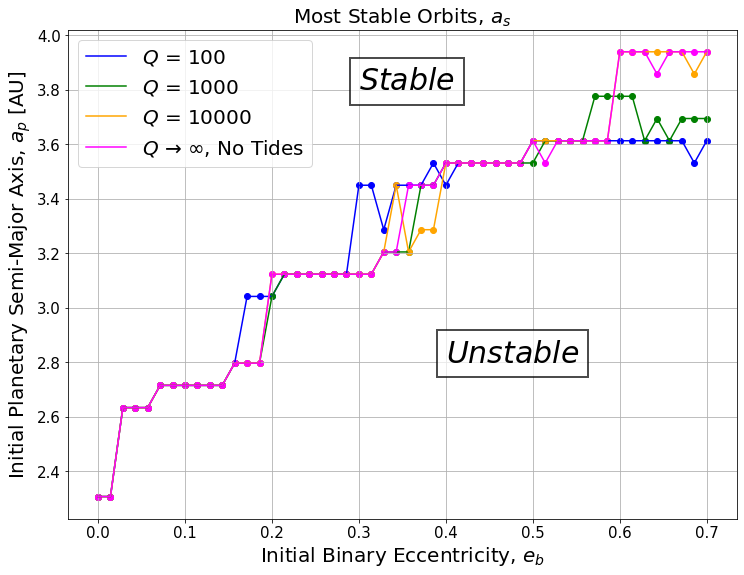

In [227]:
fig, axs = plt.subplots(1 ,figsize=(12,9))

axs.scatter(q_100[0],q_100[2], color="blue")
axs.plot(q_100[0],q_100[2], color="blue", label= "$Q$ = 100")

axs.scatter(q_1000[0],q_1000[2], color="green")
axs.plot(q_1000[0],q_1000[2], color="green", label= "$Q$ = 1000")

axs.scatter(q_10000[0],q_10000[2], color="orange")
axs.plot(q_10000[0],q_10000[2], color="orange", label= "$Q$ = 10000")

axs.scatter(q_inf[0],q_inf[2], color="magenta")
axs.plot(q_inf[0],q_inf[2], color="magenta", label= r"$Q$ $\to$ $\infty$, No Tides")

axs.annotate(xy=(0.1,4), xytext=(0.4,2.8), text="$Unstable$", fontsize=30, 
             bbox= dict(boxstyle="square,pad=0.3", fc="white", ec="black", lw=2, alpha=0.7))
axs.annotate(xy=(0.1,4), xytext=(0.3,3.8), text="$Stable$", fontsize=30, 
                   bbox= dict(boxstyle="square,pad=0.3", fc="white", ec="black", lw=2, alpha=0.7))

axs.set_title("Most Stable Orbits, $a_{s}$", size=20)
axs.set_ylabel("Initial Planetary Semi-Major Axis, $a_{p}$ [AU]", size=20)
axs.set_xlabel("Initial Binary Eccentricity, $e_{b}$", size=20)
axs.tick_params(axis="both",labelsize=15)
axs.legend(fontsize=20)
axs.grid()

plt.savefig("most_stable.png")

In [186]:
""" Most Stable Orbits Residuals"""
ms_inf = np.array(q_inf[2]) - np.array(q_inf[2])
ms_100 = np.array(q_100[2]) - np.array(q_inf[2])
ms_1000 = np.array(q_1000[2]) - np.array(q_inf[2])
ms_10000 = np.array(q_10000[2]) - np.array(q_inf[2])

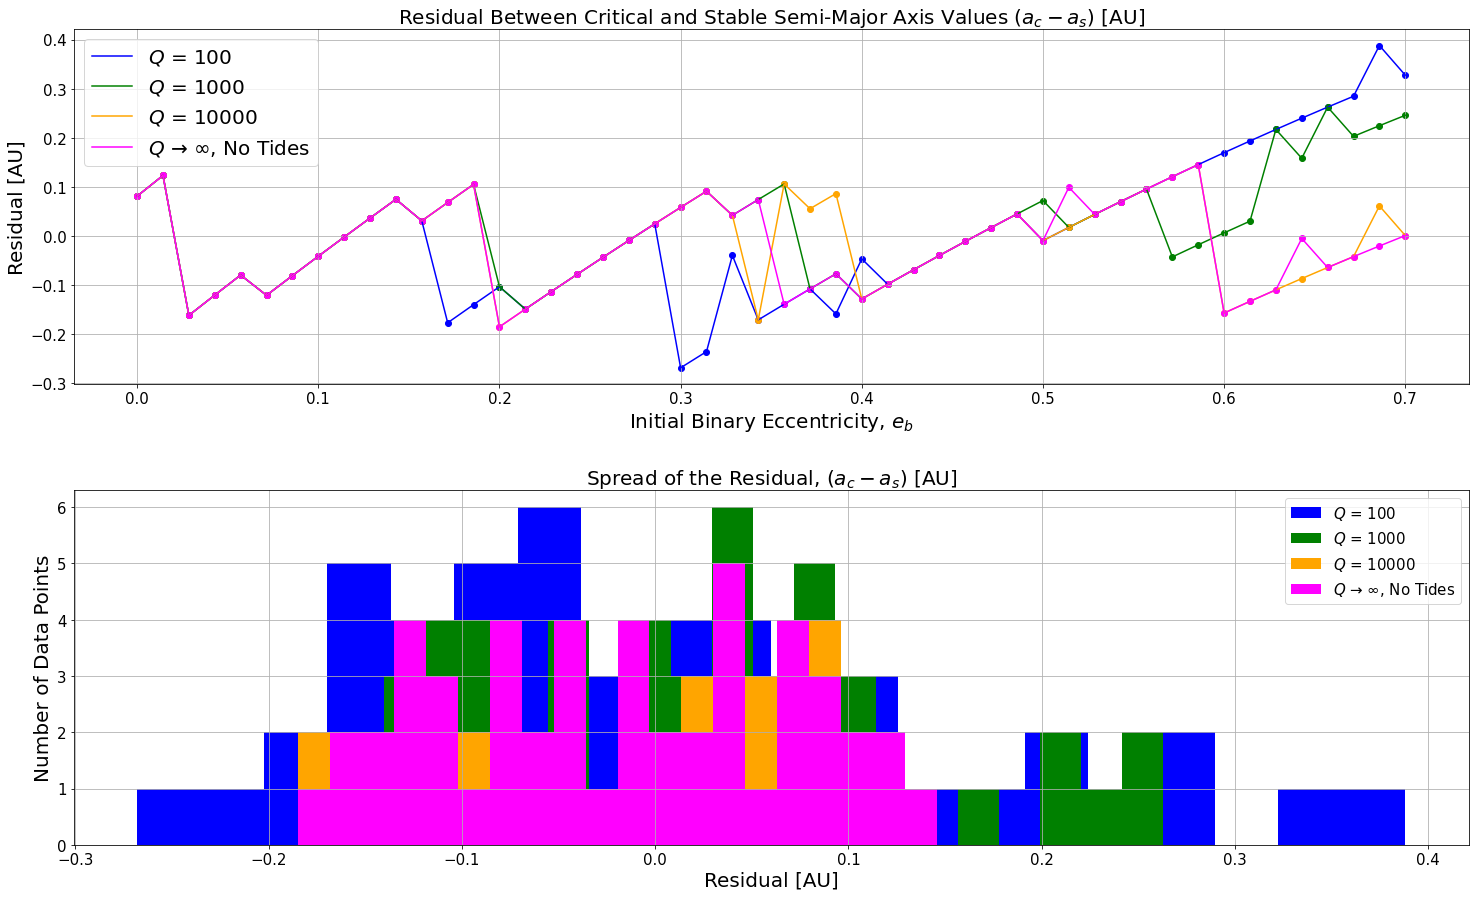

In [228]:
fig, axs = plt.subplots(2 ,figsize=(25,15))

axs[0].scatter(q_100[0],q_100[1], color="blue")
axs[0].plot(q_100[0],q_100[1], color="blue", label= "$Q$ = 100")

axs[0].scatter(q_1000[0],q_1000[1], color="green")
axs[0].plot(q_1000[0],q_1000[1], color="green", label= "$Q$ = 1000")

axs[0].scatter(q_10000[0],q_10000[1], color="orange")
axs[0].plot(q_10000[0],q_10000[1], color="orange", label= "$Q$ = 10000")

axs[0].scatter(q_inf[0],q_inf[1], color="magenta")
axs[0].plot(q_inf[0],q_inf[1], color="magenta", label= r"$Q$ $\to$ $\infty$, No Tides")

axs[0].set_title(r"Residual Between Critical and Stable Semi-Major Axis Values ($a_{c} - a_{s}$) [AU]", size=20) 
axs[0].set_ylabel("Residual [AU]", size=20)
axs[0].set_xlabel("Initial Binary Eccentricity, $e_{b}$", size=20)
axs[0].tick_params(axis="both",labelsize=15)
axs[0].legend(fontsize=20)
axs[0].grid()

hist_axis = np.linspace(-0.4,0.4,len(q_10[1]))
bins = 20

axs[1].hist(q_100[1],bins, color="blue", label="$Q$ = 100")
axs[1].hist(q_1000[1],bins, color="green", label="$Q$ = 1000")
axs[1].hist(q_10000[1],bins, color="orange", label="$Q$ = 10000")
axs[1].hist(q_inf[1],bins, color="magenta", label= r"$Q$ $\to$ $\infty$, No Tides")

axs[1].set_title("Spread of the Residual, ($a_{c} - a_{s}$) [AU]", size=20) 
axs[1].set_xlabel("Residual [AU]", size=20) # where sigma is H+W critical semi minus my semi for each Q
axs[1].set_ylabel("Number of Data Points", size=20)
axs[1].tick_params(axis="both",labelsize=15)
axs[1].legend(fontsize=15)
axs[1].grid()


plt.subplots_adjust(hspace=0.3)
plt.savefig("residual_and_histogram.png")

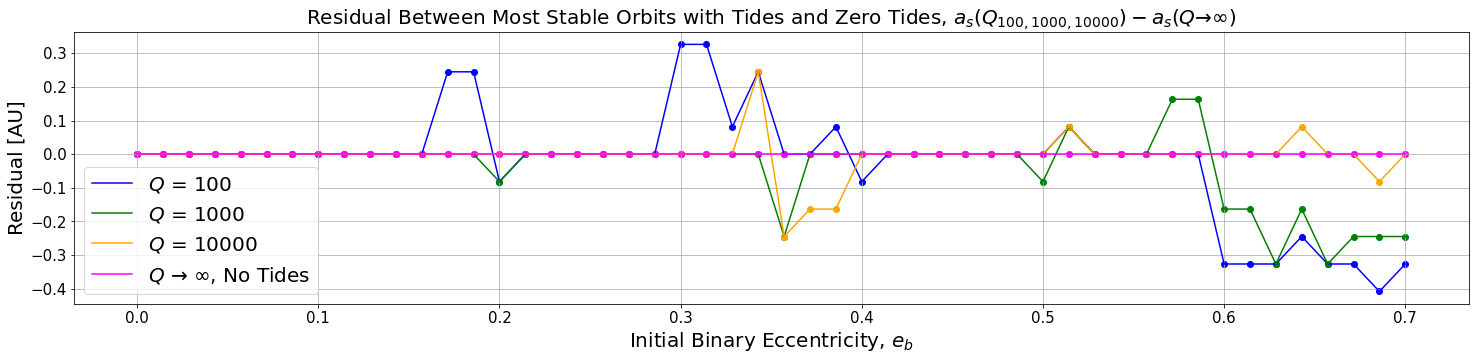

In [230]:
fig, axs = plt.subplots(1,figsize=(25,5))

axs.scatter(q_100[0], ms_100, color="blue")
axs.plot(q_100[0], ms_100, color="blue", label= "$Q$ = 100")

axs.scatter(q_1000[0], ms_1000, color="green")
axs.plot(q_1000[0], ms_1000, color="green", label= "$Q$ = 1000")

axs.scatter(q_10000[0], ms_10000, color="orange")
axs.plot(q_10000[0], ms_10000, color="orange", label= "$Q$ = 10000")

axs.scatter(q_inf[0], ms_inf, color="magenta")
axs.plot(q_inf[0], ms_inf, color="magenta", label= r"$Q$ $\to$ $\infty$, No Tides")

axs.set_title(r"Residual Between Most Stable Orbits with Tides and Zero Tides, $a_{s}(Q_{100, 1000, 10000}) - a_{s}(Q \to \infty)$", size=20) 
axs.set_ylabel("Residual [AU]", size=20)
axs.set_xlabel("Initial Binary Eccentricity, $e_{b}$", size=20)
axs.tick_params(axis="both",labelsize=15)
axs.legend(fontsize=20)
axs.grid()

plt.savefig("most_stable_residual.png", bbox_inches="tight")

In [ ]:
# put function last_ecc in a for loop to loop through all the files in a directory and collect all the final 
# ecc vals to plot
#sim5 = sim_params("COPE_SUNNY_FINE_LONG_eb0.500_ap4.347_Np15.0_tup50.0_Q100.0_tau0.3030.bin","xarchive_SUNNY_FINE_LONG.bin",0.3030)

In [75]:
### THE DATA FOR THIS IS READY TO GO SO ALL IT NEEDS IS THE CODE
def sim_params(archive, extras):
    """ Grabbing the simulation parameters from the simulation archive"""
    sim = None
    sim = rx.SimulationArchive(archive, rebxfilename=extras)
    end_snap = len(sim)-1
    e = sim[end_snap][0].particles[1].e
    #a = sim[0][0].particles[1].a
    #k_2 = sim[0][0].particles[0].params["tctl_k1"]
    # tau must be manually input
    #G = 1 # gravitational constant is now 1 to reflect REBOUND units for the odeint (#G = 6.67E-11)
    #R_star = 0.1*(1-0.5)**(1/3)
    
    #NB = sim[0][0].particles[1].n
    #K0 = ((3/2)*(NB**2)*k_2*tau)*((G*(M1**2))/R_star)*((M1/M2)**2)*(R_star/a)**6
    
    return e